In [30]:
import pandas as pd

kidney_disease = pd.read_csv(r'Data/original_dataset.csv')
display(kidney_disease)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Exploratory Data Analysis

### Shape

In [31]:
kidney_disease.shape

(400, 26)

The dataset has:
- 25 features
- 1 target
- 400 rows

## Features meaning

- Specific_gravity:  urine specific gravity results will fall [1.002 , 1.030] if your kidneys are functioning normally (determine how well your kidneys are diluting your urine).

    - Higher the number of specific gravity -> dehydrated
    - Lower the number of specific gravity ->  hydrated
    - Good health = [1.002 , 1.030]


- Albumin: is a protein found in the blood. A healthy kidney doesn't let albumin pass from the blood into the urine. A damaged kidney lets some albumin pass into the urine. The less albumin in your urine, the better.


    - Good health = 0 (maybe)


- Red_blood_cells : (Anemia is common in people who have chronic kidney disease Anemia is common in people who have chronic kidney disease). Red blood cells are made by the bone marrow. To get the marrow to make red blood cells, the kidneys make a hormone called erythropoietin, or EPO. When the kidneys are damaged, they may not make enough EPO. Without enough EPO, the bone marrow does not make enough red blood cells, and you have anemia.


    - Normal -> good health
    - Abnormal -> sick
    

- Sugar :


    - 0 -> good health
    - 0 > (greater then 0) sick (not sure)
    

- Pus cells are a collection of dead, white blood cells that accumulates when the body’s immune system activates in response to an infection:


    - Normal -> small quantite in the urine (health person)
    - Abnormal -> not .. (maybe sick)


- pus_cell_clumps the present in the urine:


    - notpresent -> not sick 
    - present -> maybe sick
    

- Bacteria the present in the urine:


    - notpresent -> not sick (maybe)
    - present -> maybe sick
    
    

- blood_glucose_random the present in the urine:


    - the recommended targets for most people are:
        - Before meals: 90-130 mg/dL
        
        
    - Two hours after the start of a meal: Below 180 mg/dL
        - 90 – 180 -> maybe health
        - Else maybe sick



- blood urea : Urea nitrogen is a waste product that your kidneys remove from your blood. Higher than normal BUN levels may be a sign that your kidneys aren't working well:


    - 7 - 20 mg/dL is a normal level -> maybe healthy
    - Else maybe sick  
    

- pus_cell_clumps the present in the urine:


    - notpresent -> not sick 
    - present -> maybe sick


## Duplicate rows check

In [32]:
# Find duplicate rows
duplicates = kidney_disease[kidney_disease.duplicated()]

# Print the duplicate rows
display(duplicates)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


**Conclusion**
- No duplicates

## Features and target type

In [33]:
kidney_disease.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**Conclusion :**
- We need to handle the features with an object type and convert them to number types (int, float)

### Feature types : unique values

For each column that have an object type, we check the unique values

In [34]:
for col in kidney_disease:
    if kidney_disease[col].dtype==object:
        print(col+'\t', kidney_disease[col].unique())

rbc	 [nan 'normal' 'abnormal']
pc	 ['normal' 'abnormal' nan]
pcc	 ['notpresent' 'present' nan]
ba	 ['notpresent' 'present' nan]
pcv	 ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc	 ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5

**Conclusion:**
    - classification , coronary_artery_disease , diabetes_mellitus : need to change a correct format like ckd\t become ckd (Noisy)
    - red_blood_cell_count , white_blood_cell_count , packed_cell_volume : need to be converted to number

## Percentage of null value

In [35]:
(kidney_disease.isnull().sum() / len(kidney_disease))*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [36]:
kidney_disease.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**Need first to handle empty value before doing correlation because we have some high percentage**

## Data distribution

### Numeric features

Continuous Columns:
 age  - bp  - sg  - al  - su  - bgr  - bu  - sc  - sod  - pot  - hemo

Discrete Columns:
 rbc  - pc  - pcc  - ba  - htn  - dm  - cad  - appet  - pe  - ane  - classification


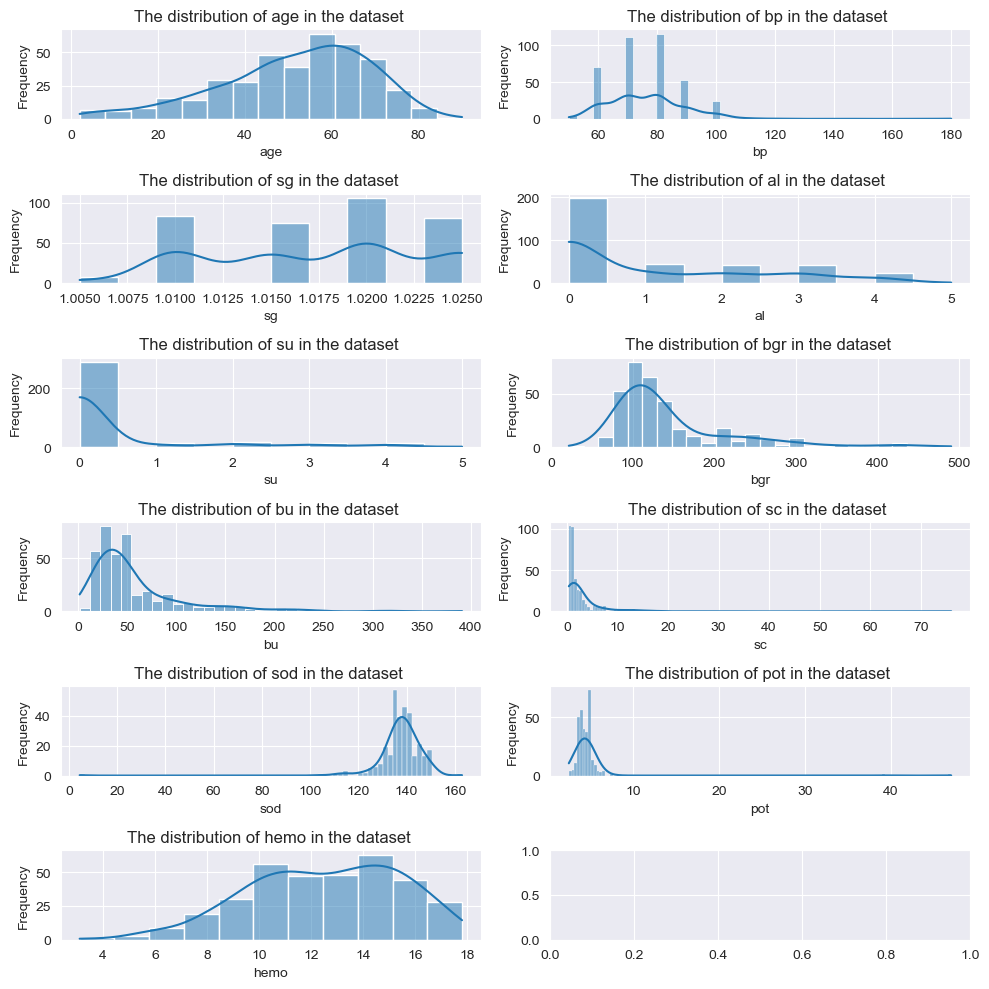

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_cols = kidney_disease.select_dtypes(include=['float64', 'int64']).columns.tolist()
discrete_cols = kidney_disease.select_dtypes(include=['object']).columns.tolist()
continuous_cols.remove('id') # The id column is not necessary

# The following columns are not discrete
discrete_cols.remove('pcv')
discrete_cols.remove('wc')
discrete_cols.remove('rc')
print("Continuous Columns:\n", "  - ".join(continuous_cols))
print("\nDiscrete Columns:\n", "  - ".join(discrete_cols))

fig, axs = plt.subplots(6, 2, figsize=(10, 10))

for index,col in enumerate(continuous_cols):

    sns.histplot(data=kidney_disease[col],ax=axs[index//2 , index%2] ,kde=True)

    # set the title and axis labels
    axs[index//2 , index%2].set_title('The distribution of '+ col +' in the dataset ')
    axs[index//2 , index%2].set_xlabel(col)
    axs[index//2 , index%2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

### Categorical features

/var/folders/kb/r4xjj9lx7lj02x3fwd6xr4zh0000gn/T/ipykernel_35995/1448799761.py:9: UserWarning: Glyph 9 (	) missing from current font.
  fig.tight_layout()
/Users/mohamedboukhtam/anaconda3/envs/DS50/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


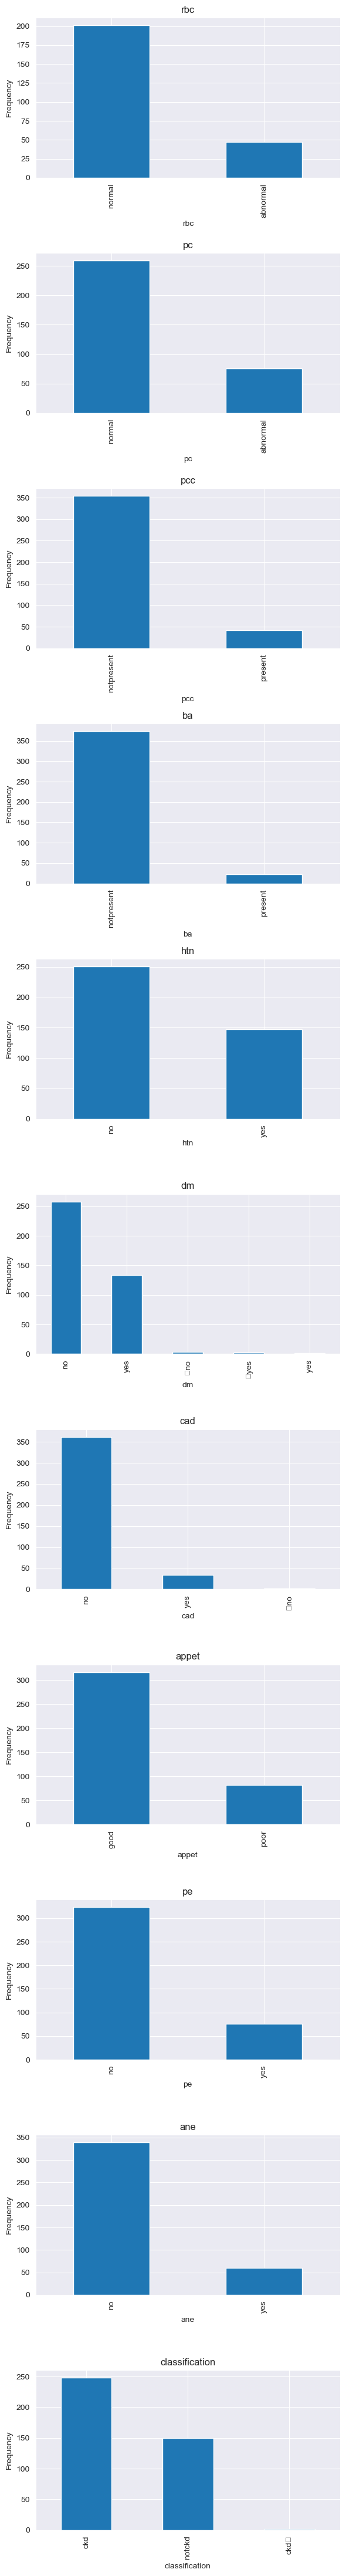

In [49]:
num_cols = len(discrete_cols)
fig, axes = plt.subplots(nrows=num_cols, figsize=(6, 4*num_cols))
for i, col in enumerate(discrete_cols):
    ax = axes[i]
    kidney_disease[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
fig.tight_layout()
plt.show()

## Outliers

In [65]:
import numpy as np

# Calculate the first and third quartiles
Q1 = kidney_disease.quantile(0.25, numeric_only=True)
Q3 = kidney_disease.quantile(0.75, numeric_only=True)

# Calculate the IQR
IQR = Q3 - Q1

# Find the outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = ((kidney_disease < lower_bound) | (kidney_disease > upper_bound)).sum(axis=0)

# Check if there are any outliers
if outliers.sum() == 0:
    print("No columns with outliers.")
else:
    # Calculate the percentage of data that is an outlier for each column
    n_rows = kidney_disease.shape[0]
    outliers_percent = outliers/n_rows*100

    # Print the columns with outliers and their impact
    print("Columns with outliers:")
    outliers_df = pd.DataFrame(outliers_percent, index=outliers.index, columns=["Outliers (%)"])
    print(outliers_df[outliers_df["Outliers (%)"] > 0])

Columns with outliers:
      Outliers (%)
age           2.50
bgr           8.50
bp            9.00
bu            9.50
hemo          0.25
pot           1.00
sc           12.75
sod           4.00
su           15.25


/var/folders/kb/r4xjj9lx7lj02x3fwd6xr4zh0000gn/T/ipykernel_35995/242369367.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((kidney_disease < lower_bound) | (kidney_disease > upper_bound)).sum(axis=0)


## Features correlation

<Axes: >

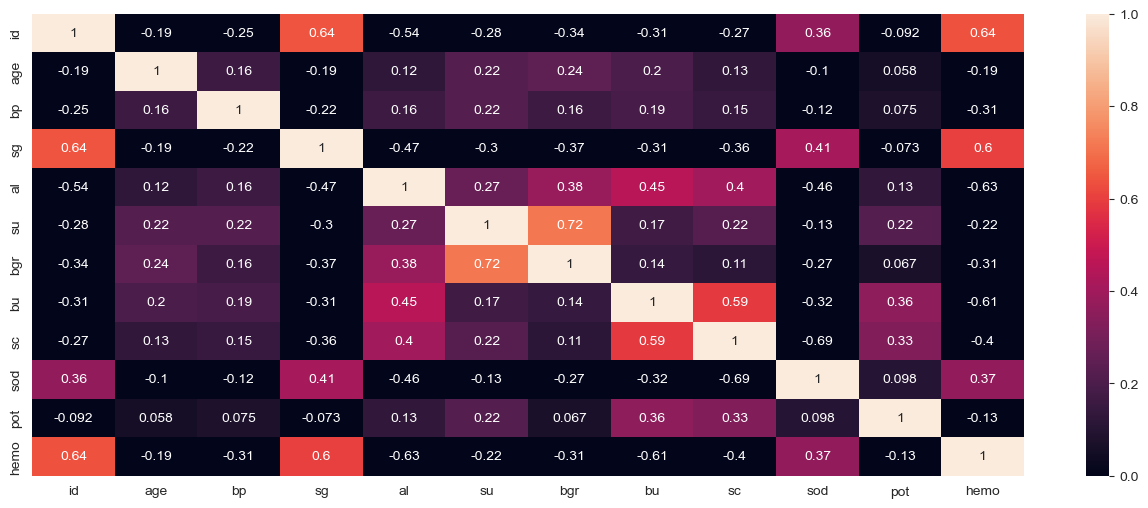

In [66]:
plt.figure(figsize=(16, 6))
sns.heatmap(kidney_disease.corr(numeric_only=True), vmin=0, vmax=1, annot=True)